# Think Stats 2 Chapter 3: Probability Mass Functions

Think Stats 2 was written by Allen B. Downey

**The Question: Do first babies tend to be born late?**

**NOTE**: I will be using the same notation as the textbook. It is defined in Section 3.2 as follows: 

``"My notation in this section might seem inconsistent, but there is a system: I
use Pmf for the name of the class, pmf for an instance of the class, and PMF
for the mathematical concept of a probability mass function."`` 

In [1]:
import nsfg, thinkplot, probability, thinkstats2
import pandas as pd
import numpy as np

pd.options.display.max_rows = 400
pd.options.display.max_columns = 244

In [2]:
# read survey data
preg = nsfg.ReadFemPreg()

# filter to live births only
live = preg[preg.outcome == 1]

# filter live births by firstborns vs. others
first = live[live.birthord == 1]
other = live[live.birthord != 1]

# define width to be used for stacked graphs
width = 0.45

# define axis to use for comparing PMFs
ax = [27, 46, 0, 0.6]

We can answer the above question using PMFs.

We were not able to answer the question using the **distribution** alone (visualized with a histogram) because the ``first`` and ``other`` dataFrames have a different number of values. Therefore, comparing the frequencies within each would be misleading. By converting frequencies to probabilities, we're able to compare the two distributions effectively and without being mislead by the difference sample size.

In [3]:
# get Pmf instances
first_pmf = thinkstats2.Pmf(first.prglngth)
other_pmf = thinkstats2.Pmf(other.prglngth)

print(f"""
first_pmf:\n\n{first_pmf}
""")


first_pmf:

Pmf({39: 0.47903920235667347, 40: 0.12145932472241106, 41: 0.08157715839564922, 38: 0.0616360752322683, 37: 0.04713346929526399, 42: 0.04645365964196692, 36: 0.03897575345569907, 35: 0.03602991162474507, 43: 0.01971447994561523, 30: 0.016542034896895538, 32: 0.012463176977113076, 34: 0.006571493315205076, 33: 0.0063448900974393836, 28: 0.005438477226376614, 44: 0.005211874008610923, 26: 0.0036256514842510764, 31: 0.003399048266485384, 29: 0.0020394289598912306, 24: 0.0015862225243598459, 45: 0.0013596193065941536, 22: 0.0006798096532970768, 48: 0.0006798096532970768, 20: 0.00022660321776569228, 47: 0.00022660321776569228, 17: 0.00022660321776569228, 21: 0.00022660321776569228, 25: 0.00022660321776569228, 46: 0.00022660321776569228, 23: 0.00022660321776569228, 27: 0.00022660321776569228, 0: 0.00022660321776569228})



As you can see, a ``pmf`` is very similar to an instance of ``Hist``, but it converts frequencies to probabilities by dividing each frequency by the total # of values (``n``).

If the PMF is **normalized**, the sum of the probabilities should equal ``1.0``. We can check this using the ``Total`` method.

In [4]:
# confirm our pmfs are normalized
first_pmf.Total(), other_pmf.Total()

(1.0, 1.0000000000000002)

In [9]:
# normalize other_pmf (since it's slightly off)
other_pmf.Normalize()
other_pmf.Total()

1.0

Okay, now let's compare these PMF's visually by plotting two figures:
1. Pmf as a bar graph (helpful when the number of values in the pmf is small)
2. Pmf as a step function (useful when large num. values in Pmf and Pmf is smooth)

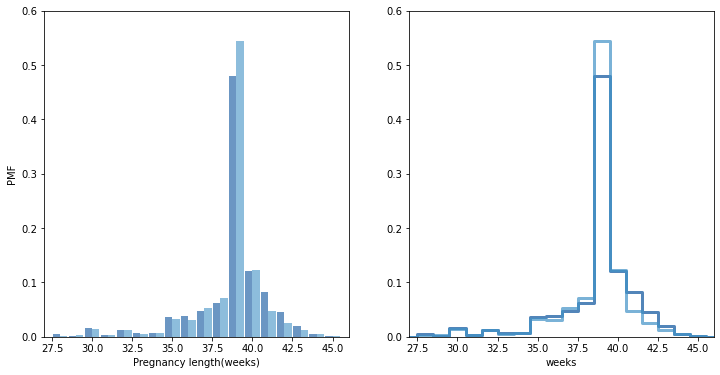

<Figure size 576x432 with 0 Axes>

In [11]:
# hint to thinkplot that the resulting figure will have one row (default), two columns
thinkplot.PrePlot(2, cols=2)

# define axes (since we are going to be comparing two charts, they need to have the same axis)
ax = [27, 46, 0, 0.6] # syntax: [x_min, x_max, y_min, y_max]

# create first figure (left)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=ax)

# create the second figure
thinkplot.PrePlot(2) # call PrePlot again to reset color generator
thinkplot.SubPlot(2) # call SubPlot to indicate a switch to the second figure (shown on right of this cell's output)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks', axis=ax)

We can use the ``Prob`` method on Pmf instances to get the probability of a certain value, like so:

In [16]:
first_pmf.Prob(39)

0.47903920235667347

In the NSFG data, the biggest differences in the distributions are near the
mode. So it makes sense to zoom in on that part of the graph, and to
transform the data to emphasize differences. 

We will do this by getting the probability for first births and other births during each week and take the difference. That difference tells us, for each week, how much more likely a first baby is to be born during a certain week than a not-first baby.

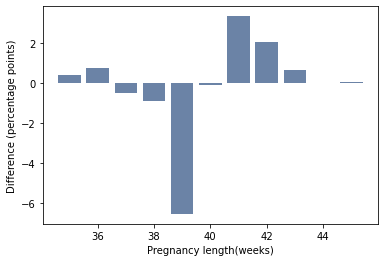

In [22]:
weeks = range(35, 46)

diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')

The above figure clarifies the pattern we're seeing: first babies are less likely to be born at 39 weeks, and more likely to be born at 41 & 42 weeks. We're not quite sold on this conclusion yet. We need to determine whether this effect is due to random variation or not (we will address this later on).